### upset plots for pc1/2/control overlaps


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import ast
import re

import upsetplot as up
from tqdm.auto import tqdm  # for notebooks

# Create new `pandas` methods which use `tqdm` progress
# (can use tqdm_gui, optional kwargs, etc.)
tqdm.pandas()

In [2]:
prefix = '/home/klawren/oak/pcqtls'
tissue_df = pd.read_csv(f"{prefix}/data/references/selected_tissue_ids.csv", header=0)
tissue_ids = list(tissue_df['Tissue'])


### Upset membership plot

#### Overlapping lead variants

In [3]:
#TODO - why are the two following plots different??

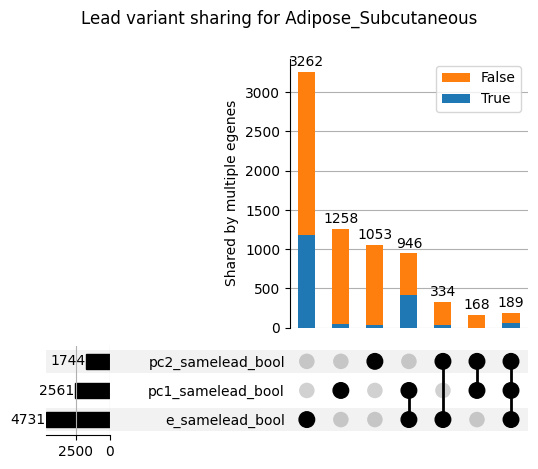

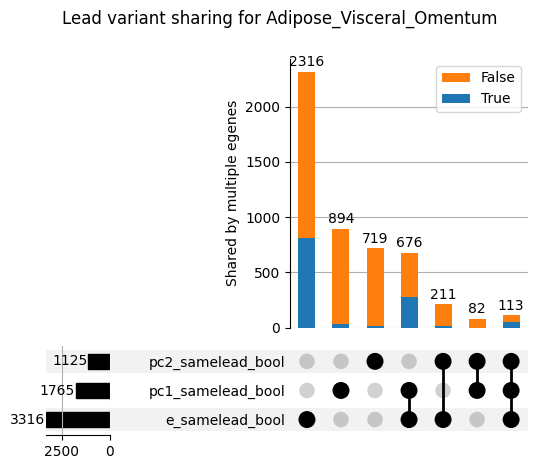

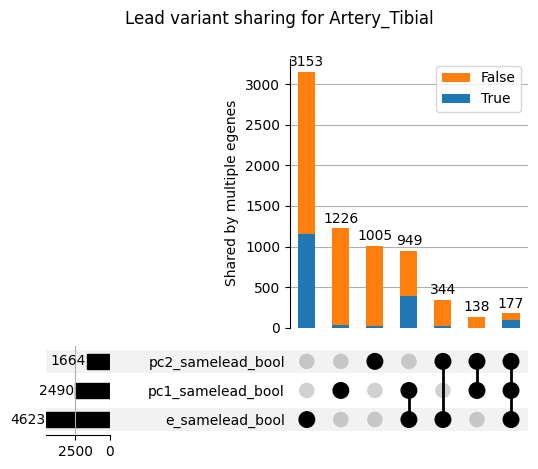

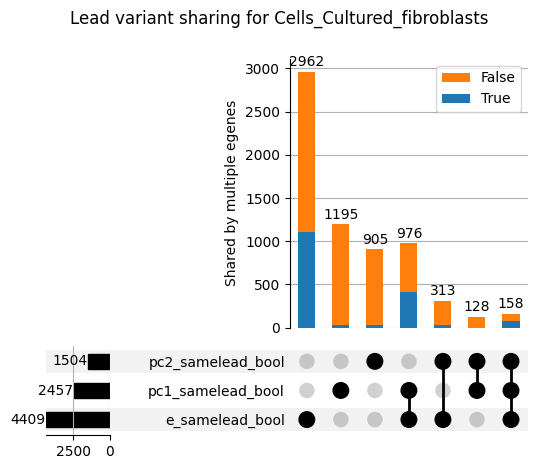

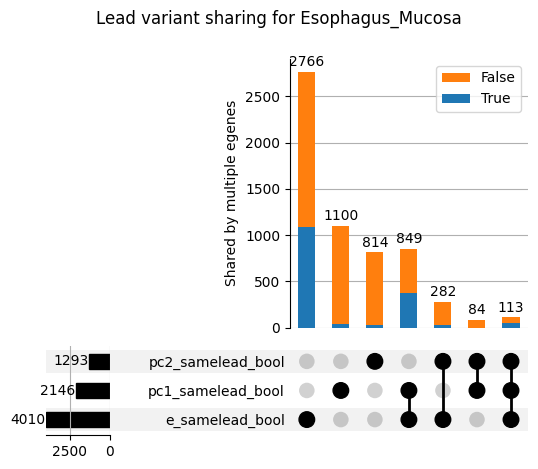

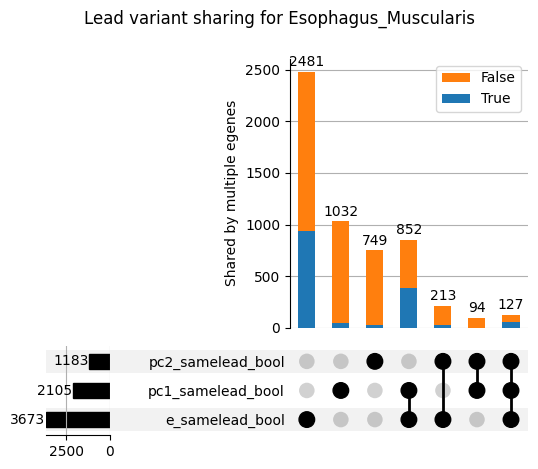

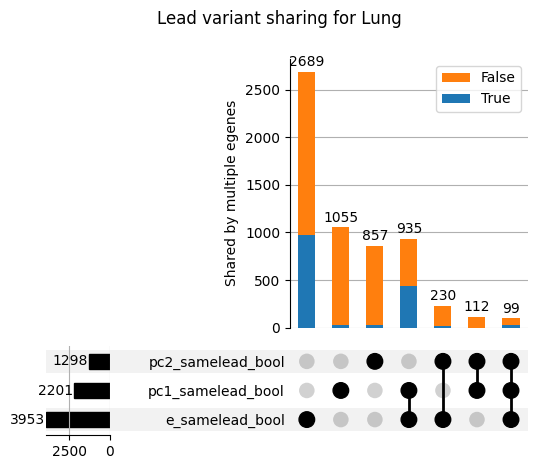

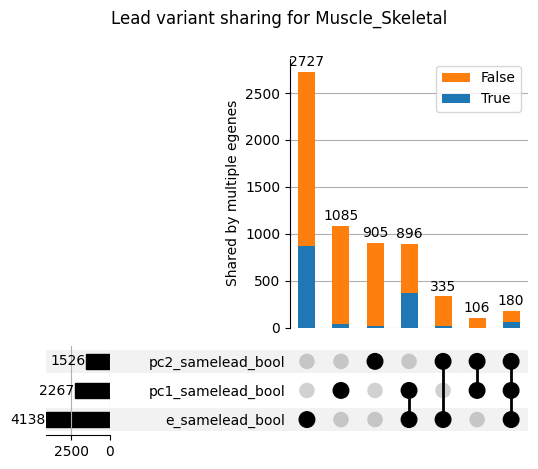

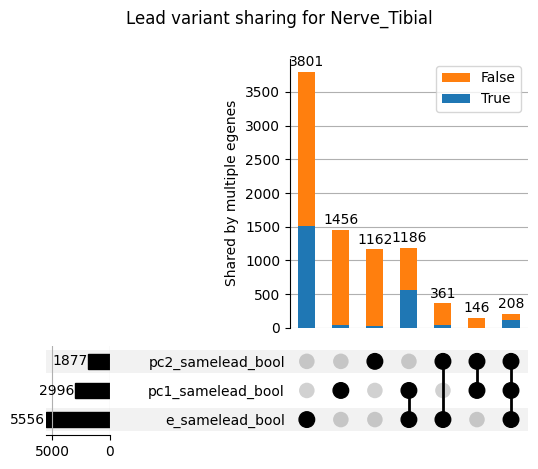

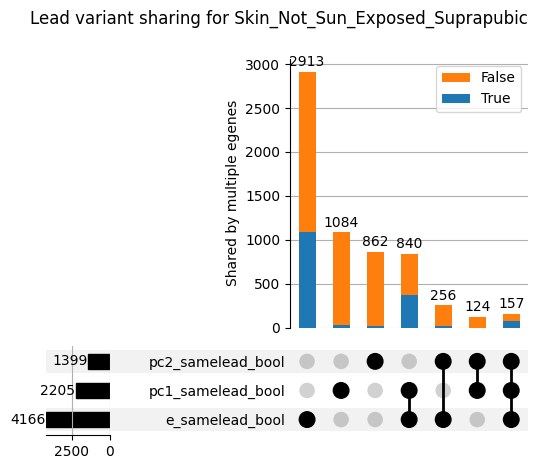

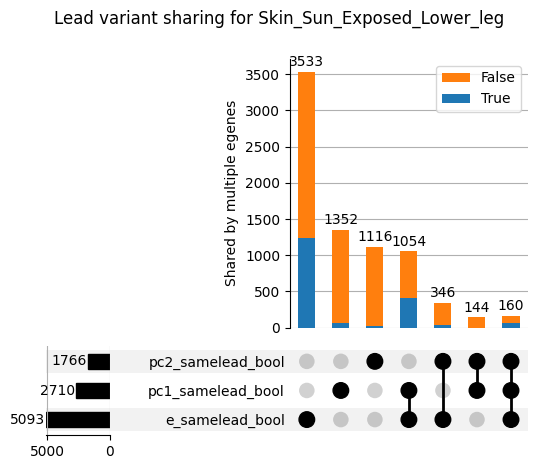

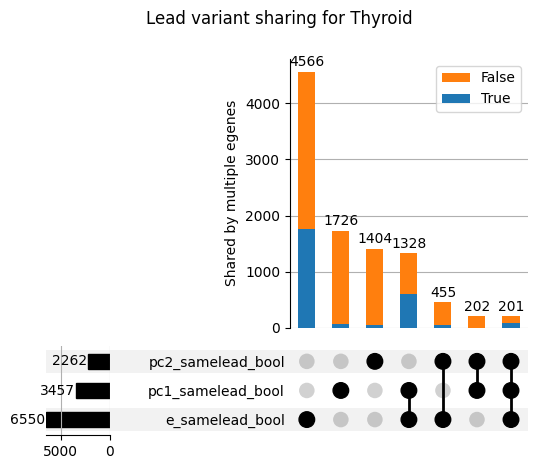

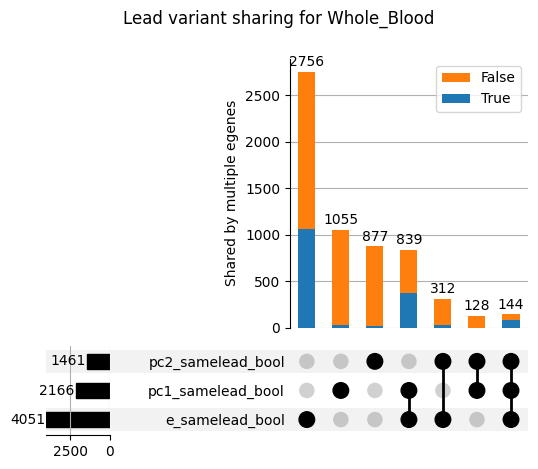

In [4]:
# upset for each tissue individually
for i in range(len(tissue_ids)):
    tissue_id = tissue_ids[i]
    overlap_df = pd.read_csv(f'{prefix}/output/overlap/{tissue_id}.v8.overlap.txt', sep='\t')
    overlap_df = pd.read_csv(f'{prefix}/output/overlap/{tissue_id}.v8.overlap.txt', sep='\t')
    overlap_df['e_samelead_bool'] = overlap_df['num_e_samelead'] > 0
    overlap_df['pc1_samelead_bool'] = overlap_df['num_pc1_samelead'] > 0
    overlap_df['pc2_samelead_bool'] = overlap_df['num_pc2_samelead'] > 0
    overlap_df['multiple_e_shared'] = overlap_df['num_e_overlap']>1    

    upset = overlap_df.set_index('e_samelead_bool').set_index('pc1_samelead_bool', append=True).set_index('pc2_samelead_bool', append=True)

    upset = up.UpSet(upset, intersection_plot_elements=0,show_counts=True)  # disable the default bar chart
    upset.add_stacked_bars(by="multiple_e_shared", title="Shared by multiple egenes", elements=8)
    upset.plot()
    plt.suptitle(f'Lead variant sharing for {tissue_id}')
    plt.show()

In [15]:
def get_upset_to_plot(overlap_df):
    # group by lead variants, see which cs/phenotype combos they appear in
    lead_var_phenotypes = overlap_df.groupby('lead_variant_id')['cs_full_id'].apply(list)
    upset_df = pd.DataFrame(pd.Series(lead_var_phenotypes, name='cs_id_list'))

    # make indicator columns
    upset_df['e_shared'] = upset_df['cs_id_list'].astype(str).str.contains('_e')
    upset_df['pc1_shared'] = upset_df['cs_id_list'].astype(str).str.contains('_pc1')
    upset_df['pc2_shared'] = upset_df['cs_id_list'].astype(str).str.contains('_pc2')

    # add columns indicating the number of shared egenes
    upset_df['num_e_shared'] = upset_df['cs_id_list'].astype(str).str.count('_e')/2
    upset_df['multiple_e_shared'] = upset_df['num_e_shared']>1

    # make upset_plot object
    upset_to_plot = upset_df.set_index('e_shared').set_index('pc1_shared', append=True).set_index('pc2_shared', append=True)
    return upset_to_plot

def plot_upset(overlap_df, title):
    upset_to_plot=get_upset_to_plot(overlap_df)
    upset = up.UpSet(upset, intersection_plot_elements=0,show_counts=True)  # disable the default bar chart
    upset.add_stacked_bars(by="multiple_e_shared", title="Shared by multiple egenes", elements=8)
    upset.plot()
    plt.suptitle(title)
    plt.show()

In [16]:
# upset for each tissue individually
for i in range(len(tissue_ids)):
    tissue_id = tissue_ids[i]
    overlap_df = pd.read_csv(f'{prefix}/output/overlap/{tissue_id}.v8.overlap.txt', sep='\t')
    plot_upset(overlap_df, title=f'Lead variant sharing for {tissue_id}')


UnboundLocalError: local variable 'upset' referenced before assignment

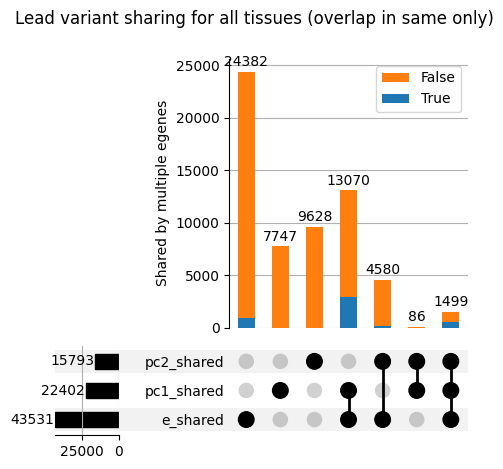

In [7]:
# all tissues, but must overlap in same tissue
# stacked bar to show if multiple egenes overlap or not
upset_dfs=[]
for i in range(len(tissue_ids)):
    tissue_id = tissue_ids[i]
    overlap_df = pd.read_csv(f'{prefix}/output/overlap/{tissue_id}.v8.overlap.txt', sep='\t')
    upset_dfs.append(get_upset_to_plot(overlap_df))
full_upset_df = pd.concat([df.assign(tissue_id=n) for df, n in zip(upset_dfs, tissue_ids)])

upset = up.UpSet(full_upset_df, intersection_plot_elements=0,show_counts=True)  # disable the default bar chart
upset.add_stacked_bars(by="multiple_e_shared", title="Shared by multiple egenes", elements=8)
upset.plot()
plt.suptitle('Lead variant sharing for all tissues (overlap in same only)')
plt.show()

In [14]:
full_overlap_df

,cs_full_id,variant_list,lead_variant_id,cluster_id,orig_cs_dataset,e_samelead,pc1_samelead,pc2_samelead,num_e_samelead,num_pc1_samelead,num_pc2_samelead,e_overlap,pc1_overlap,pc2_overlap,num_e_overlap,num_pc1_overlap,num_pc2_overlap,tissue_id
0,ENSG00000000971.15_ENSG00000116785.13_ENSG0000...,"['chr1_196382020_A_C_b38', 'chr1_196388616_A_G...",chr1_196447806_GAC_G_b38,ENSG00000000971.15_ENSG00000116785.13_ENSG0000...,control_eqtl,['ENSG00000000971.15_ENSG00000116785.13_ENSG00...,[],[],1,0,0,['ENSG00000000971.15_ENSG00000116785.13_ENSG00...,[],[],2,0,0,Adipose_Subcutaneous
1,ENSG00000000971.15_ENSG00000116785.13_ENSG0000...,['chr1_196740093_A_T_b38'],chr1_196740093_A_T_b38,ENSG00000000971.15_ENSG00000116785.13_ENSG0000...,control_eqtl,['ENSG00000000971.15_ENSG00000116785.13_ENSG00...,[],[],1,0,0,['ENSG00000000971.15_ENSG00000116785.13_ENSG00...,[],[],1,0,0,Adipose_Subcutaneous
2,ENSG00000000971.15_ENSG00000116785.13_ENSG0000...,"['chr1_196690623_T_C_b38', 'chr1_196693329_T_C...",chr1_196706731_A_G_b38,ENSG00000000971.15_ENSG00000116785.13_ENSG0000...,control_eqtl,['ENSG00000000971.15_ENSG00000116785.13_ENSG00...,[],[],1,0,0,['ENSG00000000971.15_ENSG00000116785.13_ENSG00...,[],[],1,0,0,Adipose_Subcutaneous
3,ENSG00000000971.15_ENSG00000116785.13_ENSG0000...,"['chr1_196379649_C_T_b38', 'chr1_196380022_C_T...",chr1_196402302_T_C_b38,ENSG00000000971.15_ENSG00000116785.13_ENSG0000...,control_eqtl,['ENSG00000000971.15_ENSG00000116785.13_ENSG00...,[],[],1,0,0,['ENSG00000000971.15_ENSG00000116785.13_ENSG00...,[],[],2,0,0,Adipose_Subcutaneous
4,ENSG00000000971.15_ENSG00000116785.13_ENSG0000...,"['chr1_196853900_T_G_b38', 'chr1_196856834_A_G...",chr1_196862478_T_C_b38,ENSG00000000971.15_ENSG00000116785.13_ENSG0000...,control_eqtl,['ENSG00000000971.15_ENSG00000116785.13_ENSG00...,[],[],1,0,0,['ENSG00000000971.15_ENSG00000116785.13_ENSG00...,[],[],1,0,0,Adipose_Subcutaneous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6106,ENSG00000281358.1_ENSG00000068028.17_pc2_cs1,"['chr3_50246005_T_C_b38', 'chr3_50306625_A_G_b...",chr3_50310164_A_C_b38,ENSG00000281358.1_ENSG00000068028.17,pc_2_qtl,[],[],['ENSG00000281358.1_ENSG00000068028.17_pc2_cs1'],0,0,1,[],[],['ENSG00000281358.1_ENSG00000068028.17_pc2_cs1'],0,0,1,Whole_Blood
6107,ENSG00000281990.1_ENSG00000280411.1_pc2_cs1,"['chr14_106681395_G_A_b38', 'chr14_106693022_T...",chr14_106693022_T_C_b38,ENSG00000281990.1_ENSG00000280411.1,pc_2_qtl,[],[],['ENSG00000281990.1_ENSG00000280411.1_pc2_cs1'],0,0,1,[],['ENSG00000281990.1_ENSG00000280411.1_pc1_cs2'],['ENSG00000281990.1_ENSG00000280411.1_pc2_cs1'],0,1,1,Whole_Blood
6108,ENSG00000282780.1_ENSG00000211751.9_pc2_cs1,"['chr7_142798480_T_C_b38', 'chr7_142798546_A_T...",chr7_142798480_T_C_b38,ENSG00000282780.1_ENSG00000211751.9,pc_2_qtl,[],[],['ENSG00000282780.1_ENSG00000211751.9_pc2_cs1'],0,0,1,[],['ENSG00000282780.1_ENSG00000211751.9_pc1_cs1'],['ENSG00000282780.1_ENSG00000211751.9_pc2_cs1'],0,1,1,Whole_Blood
6109,ENSG00000282980.1_ENSG00000091592.15_pc2_cs1,"['chr17_5576825_C_T_b38', 'chr17_5601815_T_C_b...",chr17_5601815_T_C_b38,ENSG00000282980.1_ENSG00000091592.15,pc_2_qtl,[],[],['ENSG00000282980.1_ENSG00000091592.15_pc2_cs1'],0,0,1,[],[],['ENSG00000282980.1_ENSG00000091592.15_pc2_cs1'],0,0,1,Whole_Blood


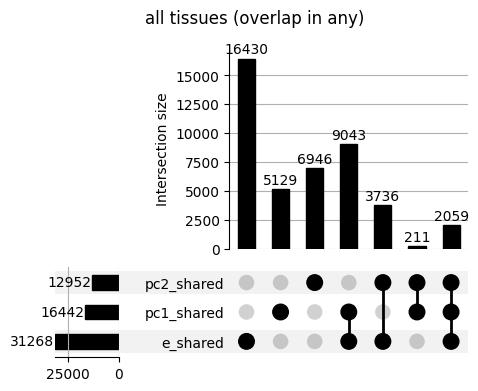

In [8]:
# upset for lead variant for all tissues (can be shared across tissues)
overlap_dfs=[]
for i in range(len(tissue_ids)):
    tissue_id = tissue_ids[i]
    overlap_dfs.append(pd.read_csv(f'{prefix}/output/overlap/{tissue_id}.v8.overlap.txt', sep='\t'))
full_overlap_df = pd.concat([df.assign(tissue_id=n) for df, n in zip(overlap_dfs, tissue_ids)])
plot_upset(full_overlap_df, 'all tissues (overlap in any)')

#### tissue specificity

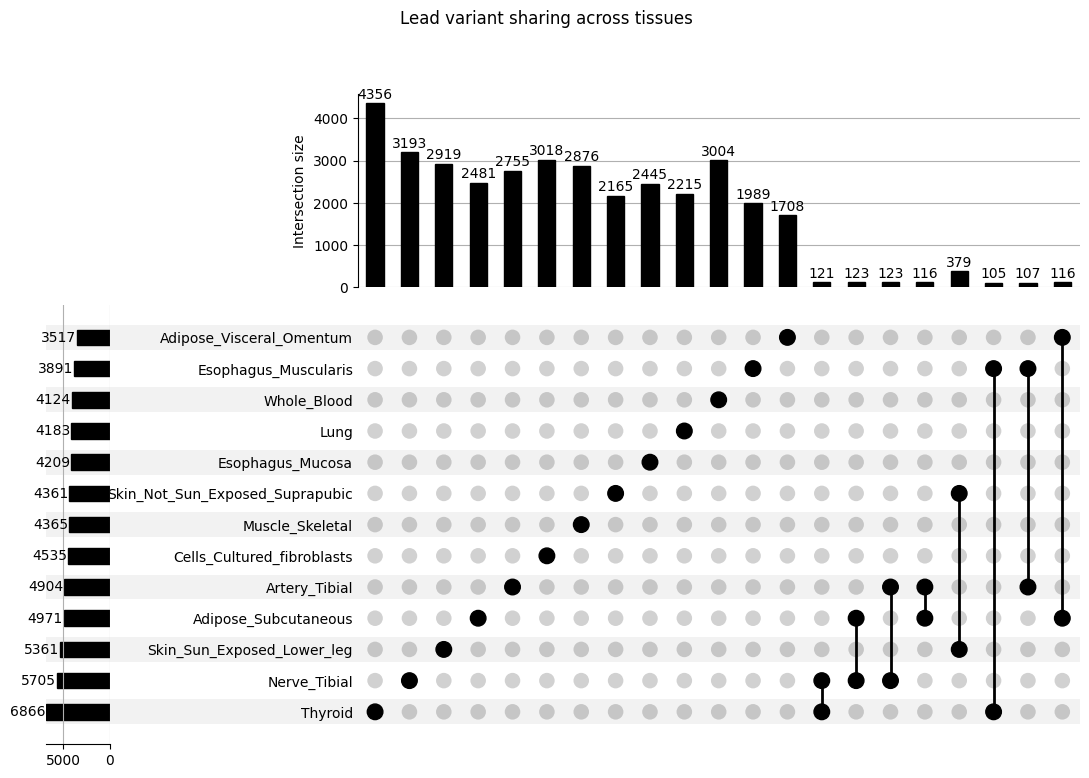

In [9]:
cs_tissues = full_overlap_df.groupby('lead_variant_id')['tissue_id'].apply(list)
up.UpSet(up.from_memberships(cs_tissues), subset_size='count', min_subset_size=100, show_counts=True).plot()
plt.suptitle('Lead variant sharing across tissues')
plt.show()

#### Overlapping credible sets

In [10]:
def get_overlap_upset(overlap_df):
    overlap_df['e_overlap_bool'] = overlap_df['num_e_overlap'] > 0
    overlap_df['pc1_overlap_bool'] = overlap_df['num_pc1_overlap'] > 0
    overlap_df['pc2_overlap_bool'] = overlap_df['num_pc2_overlap'] > 0
    overlap_df['multiple_e_shared'] = overlap_df['num_e_overlap']>1  
    return overlap_df.set_index('e_overlap_bool').set_index('pc1_overlap_bool', append=True).set_index('pc2_overlap_bool', append=True)


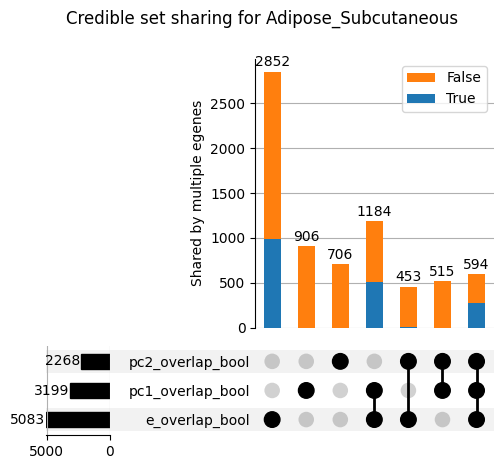

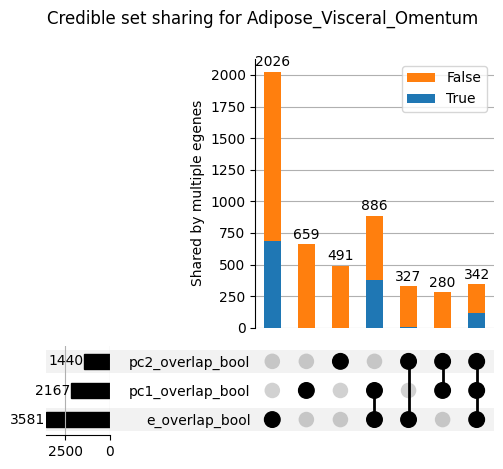

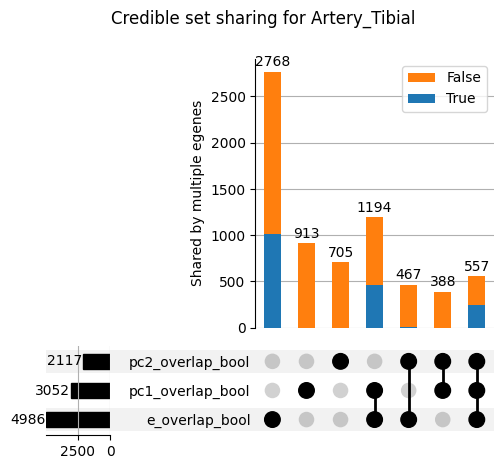

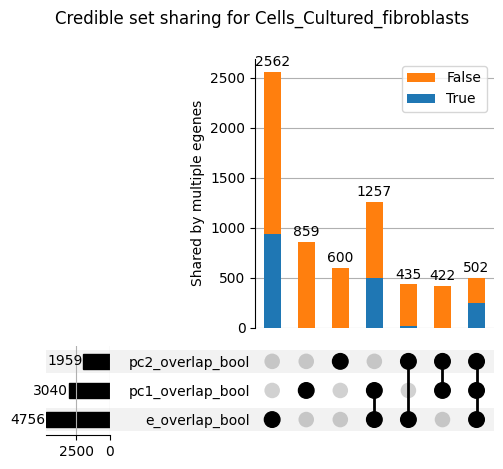

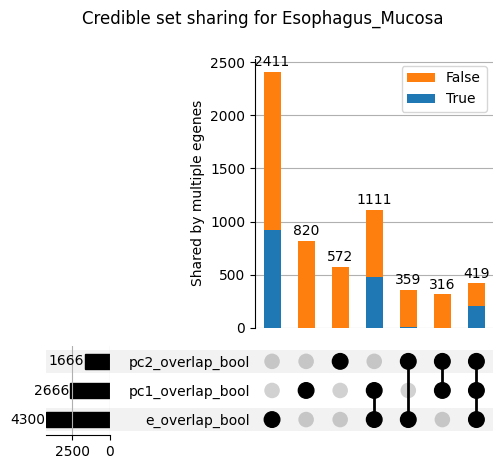

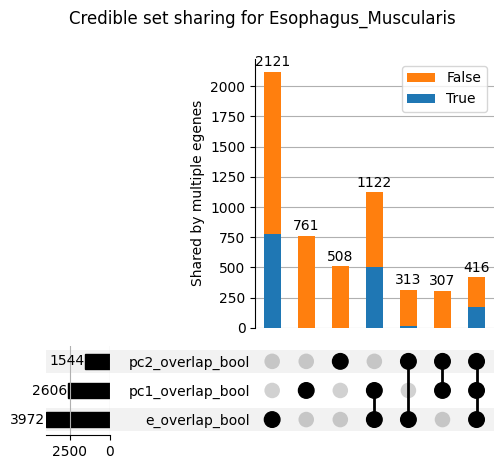

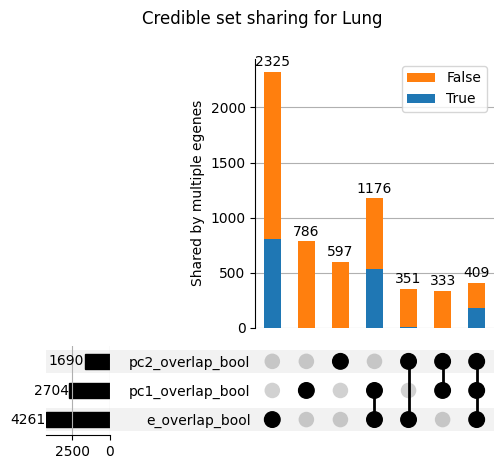

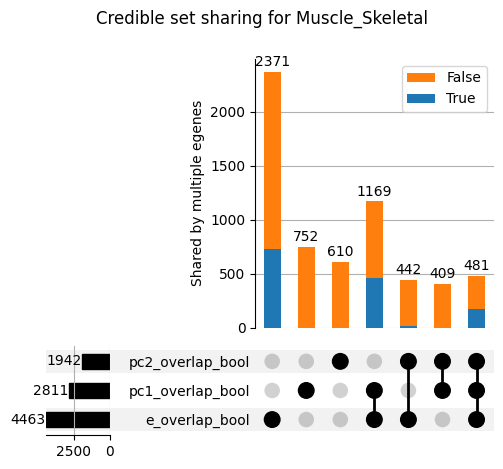

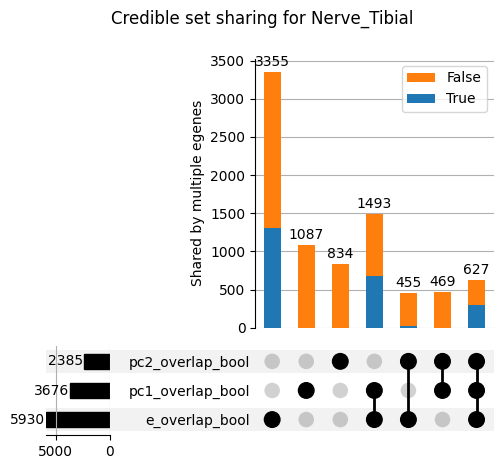

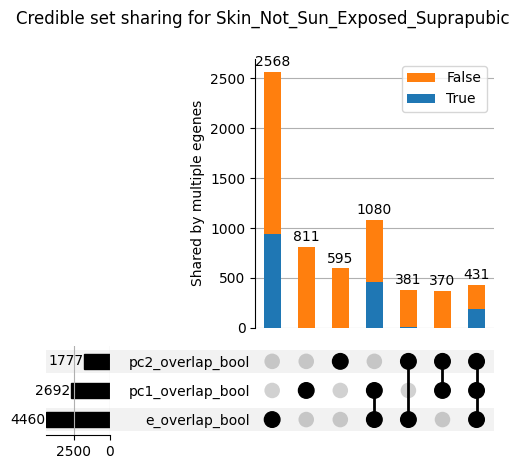

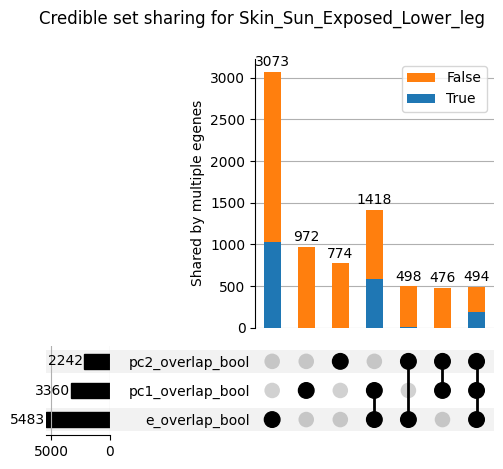

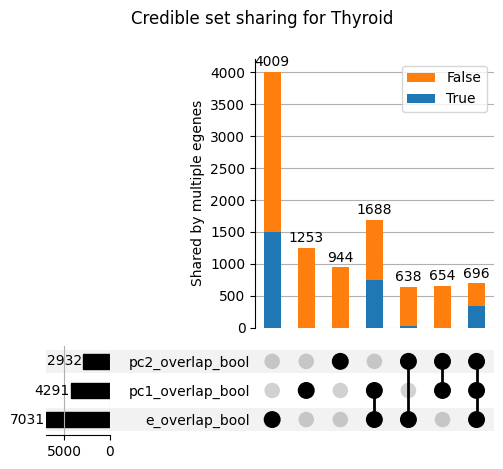

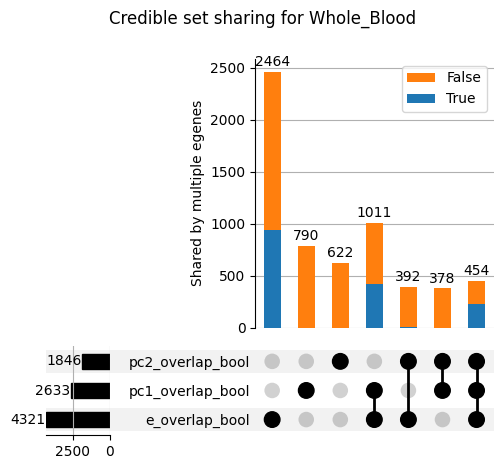

In [11]:
# upset for each tissue individually
for i in range(len(tissue_ids)):
    tissue_id = tissue_ids[i]
    overlap_df = pd.read_csv(f'{prefix}/output/overlap/{tissue_id}.v8.overlap.txt', sep='\t')
    upset = up.UpSet(get_overlap_upset(overlap_df), intersection_plot_elements=0,show_counts=True)  # disable the default bar chart
    upset.add_stacked_bars(by="multiple_e_shared", title="Shared by multiple egenes", elements=8)
    upset.plot()
    plt.suptitle(f'Credible set sharing for {tissue_id}')
    plt.show()

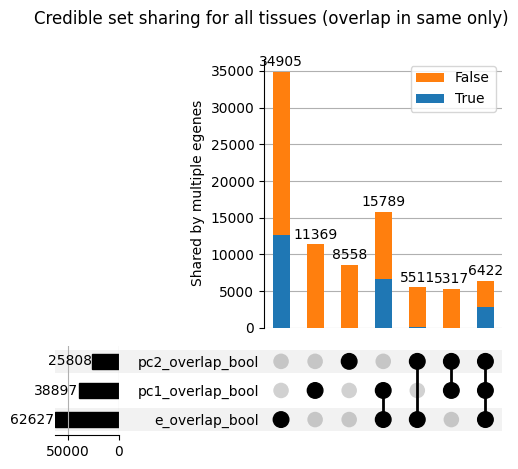

In [12]:
# all tissues, but must overlap in same tissue
# stacked bar to show if multiple egenes overlap or not
upset_dfs=[]
for i in range(len(tissue_ids)):
    tissue_id = tissue_ids[i]
    overlap_df = pd.read_csv(f'{prefix}/output/overlap/{tissue_id}.v8.overlap.txt', sep='\t')
    upset_dfs.append(get_overlap_upset(overlap_df))
full_upset_df = pd.concat([df.assign(tissue_id=n) for df, n in zip(upset_dfs, tissue_ids)])

upset = up.UpSet(full_upset_df, intersection_plot_elements=0,show_counts=True)  # disable the default bar chart
upset.add_stacked_bars(by="multiple_e_shared", title="Shared by multiple egenes", elements=8)
upset.plot()
plt.suptitle('Credible set sharing for all tissues (overlap in same only)')
plt.show()

In [13]:
full_overlap_df[full_overlap_df['num_e_overlap']>8]['cs_full_id'].values

array(['ENSG00000136834.3_ENSG00000165202.3_ENSG00000171496.3_ENSG00000197233.7_ENSG00000228914.2_ENSG00000229245.2_ENSG00000231465.2_ENSG00000234156.1_ENSG00000239590.1_e_ENSG00000136834.3_e_cs1',
       'ENSG00000136834.3_ENSG00000165202.3_ENSG00000171496.3_ENSG00000197233.7_ENSG00000228914.2_ENSG00000229245.2_ENSG00000231465.2_ENSG00000234156.1_ENSG00000239590.1_e_ENSG00000165202.3_e_cs2',
       'ENSG00000136834.3_ENSG00000165202.3_ENSG00000171496.3_ENSG00000197233.7_ENSG00000228914.2_ENSG00000229245.2_ENSG00000231465.2_ENSG00000234156.1_ENSG00000239590.1_e_ENSG00000171496.3_e_cs1',
       'ENSG00000136834.3_ENSG00000165202.3_ENSG00000171496.3_ENSG00000197233.7_ENSG00000228914.2_ENSG00000229245.2_ENSG00000231465.2_ENSG00000234156.1_ENSG00000239590.1_e_ENSG00000197233.7_e_cs1',
       'ENSG00000136834.3_ENSG00000165202.3_ENSG00000171496.3_ENSG00000197233.7_ENSG00000228914.2_ENSG00000229245.2_ENSG00000231465.2_ENSG00000234156.1_ENSG00000239590.1_e_ENSG00000228914.2_e_cs2',
       'EN